In [1]:
import os
os.chdir('C:\\Users\\Admin\\Desktop\\Data Science\\Imarticus\\Python')
#Exported files will appear here

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import sem

In [5]:
cs2m = pd.read_csv("C:/Users/Admin/Desktop/Data Science/Imarticus/Python/cs2m.csv")
cs2m = pd.DataFrame(cs2m)
grades = pd.read_csv("C:/Users/Admin/Desktop/Data Science/Imarticus/Python/grades.csv")
grades = pd.DataFrame(grades)

In [7]:
print(cs2m.shape)
print(grades.shape)
print(len(cs2m.BP))
print(len(grades.final))

(30, 6)
(105, 22)
30
105


In [13]:
grades.firstname.unique().shape
grades.firstname.unique()

array(['ALFRED', 'SCOTT', 'JACKIE', 'ANN', 'VALERIE', 'TANIECE', 'DANIEL',
       'JENNY', 'KREG', 'DAWN', 'NANCY', 'MARK', 'DENNIS', 'ELAINE',
       'DERRICK', 'MICKEY', 'JONATHAN', 'ROBERT', 'GLENDON', 'JAMES',
       'VIDYUTH', 'RENE', 'DAVENA', 'SHANNON', 'GWEN', 'VICTORINE',
       'MARY', 'TAMARA', 'WILLIAM', 'MIHAELA', 'MONIKA', 'JASON', 'NIKKI',
       'PAULA', 'SUZANNA', 'MATHEW', 'SUZANNE', 'DANA', 'TIM', 'HEIDI',
       'GAIL', 'SANDRA', 'BLAIR', 'LIZA', 'JOE', 'CYNTHE', 'LAUREL',
       'DAWNE', 'KIMBERLY', 'SHELLY', 'LISA', 'WAYNE', 'HUSIBA', 'LUCY',
       'MARITESS', 'OLIMPIA', 'RUSS', 'ANNELIES', 'VIKKI', 'JOHN',
       'TAMMY', 'DEANNA', 'DALE', 'LOIS', 'FRED', 'JIM', 'TREVOR',
       'BONNIE', 'IVAN', 'ERIC', 'STACY', 'BRENDA', 'CLAYTON', 'YVONNE',
       'RENAE', 'CARL', 'JYLL', 'KATHRYN', 'DON', 'NICHOLAS', 'MIRNA',
       'JACQUELINE', 'CARHERINE', 'CHYRELLE', 'LETICIA', 'LUCIO',
       'MICHELLE', 'RICHARD', 'KHANH', 'DENISE', 'MARTINE', 'SHERRY',
       'JANN', 

In [16]:
print(grades['quiz1'].dtype)
cs2m.info()

int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   BP       30 non-null     int64
 1   Chlstrl  30 non-null     int64
 2   Age      30 non-null     int64
 3   Prgnt    30 non-null     int64
 4   AnxtyLH  30 non-null     int64
 5   DrugR    30 non-null     int64
dtypes: int64(6)
memory usage: 1.5 KB


In [17]:
cs2m.describe()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,127.333333,185.066667,37.766667,0.500000,0.466667,0.500000
std,22.846313,28.462841,18.795970,0.508548,0.507416,0.508548
min,95.000000,130.000000,16.000000,0.000000,0.000000,0.000000
25%,111.250000,172.750000,22.000000,0.000000,0.000000,0.000000
50%,122.500000,182.500000,31.000000,0.500000,0.000000,0.500000
75%,143.750000,200.000000,53.250000,1.000000,1.000000,1.000000
max,180.000000,250.000000,81.000000,1.000000,1.000000,1.000000


In [18]:
grades.describe()

,Sr_No,id,gender,ethnicity,year,lowup,section,gpa,extrc,review,quiz1,quiz2,quiz3,quiz4,quiz5,final,total,percent
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,53.000000,571366.666667,1.390476,3.352381,2.942857,1.790476,2.000000,2.778857,1.209524,1.666667,7.466667,7.980952,7.980952,7.800000,7.866667,61.476190,100.571429,80.342857
std,30.454885,277404.128786,0.490197,1.055944,0.690994,0.408921,0.796628,0.763802,0.408921,0.473665,2.480953,1.623037,2.307933,2.280351,1.765408,7.943424,15.299483,12.135318
min,1.000000,106484.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.140000,1.000000,1.000000,0.000000,3.000000,0.000000,2.000000,2.000000,40.000000,51.000000,41.000000
25%,27.000000,337908.000000,1.000000,3.000000,3.000000,2.000000,1.000000,2.300000,1.000000,1.000000,6.000000,7.000000,6.000000,6.000000,7.000000,57.000000,92.000000,74.000000
50%,53.000000,574170.000000,1.000000,4.000000,3.000000,2.000000,2.000000,2.720000,1.000000,2.000000,8.000000,8.000000,9.000000,8.000000,8.000000,62.000000,103.000000,82.000000
75%,79.000000,807963.000000,2.000000,4.000000,3.000000,2.000000,3.000000,3.490000,1.000000,2.000000,10.000000,9.000000,10.000000,10.000000,9.000000,68.000000,111.000000,87.000000
max,105.000000,988808.000000,2.000000,5.000000,4.000000,2.000000,3.000000,4.000000,2.000000,2.000000,10.000000,10.000000,10.000000,10.000000,10.000000,75.000000,124.000000,99.000000


In [19]:
cs2m['Age'].describe()

count    30.000000
mean     37.766667
std      18.795970
min      16.000000
25%      22.000000
50%      31.000000
75%      53.250000
max      81.000000
Name: Age, dtype: float64

In [20]:
cs2m['Age'].groupby(cs2m.Prgnt).describe()

,count,mean,std,min,25%,50%,75%,max
Prgnt,,,,,,,,
0,15.0,48.000000,21.350811,16.0,30.5,56.0,62.0,81.0
1,15.0,27.533333,7.179999,18.0,20.5,29.0,31.0,40.0


In [21]:
grades['total'].groupby(grades.section).describe()

,count,mean,std,min,25%,50%,75%,max
section,,,,,,,,
1,33.0,105.090909,16.148459,51.0,97.0,108.0,118.0,124.0
2,39.0,99.487179,12.012870,75.0,92.0,98.0,107.5,124.0
3,33.0,97.333333,17.184053,52.0,87.0,100.0,109.0,122.0


In [22]:
grades.ethnicity.value_counts()

4    45
3    24
2    20
5    11
1     5
Name: ethnicity, dtype: int64

In [25]:
# Standaard error of mean
round(grades.final.sem(),3)

0.775

In [26]:
grades.std()

Sr_No            30.454885
id           277404.128786
gender            0.490197
ethnicity         1.055944
year              0.690994
lowup             0.408921
section           0.796628
gpa               0.763802
extrc             0.408921
review            0.473665
quiz1             2.480953
quiz2             1.623037
quiz3             2.307933
quiz4             2.280351
quiz5             1.765408
final             7.943424
total            15.299483
percent          12.135318
dtype: float64

In [27]:
cs2m.skew()

BP         0.572905
Chlstrl    0.559152
Age        0.844757
Prgnt      0.000000
AnxtyLH    0.140769
DrugR      0.000000
dtype: float64

(array([0.00260926, 0.00130463, 0.00391389, 0.00652316, 0.00652316,
        0.01826484, 0.02870189, 0.03392042, 0.01304631, 0.02217873]),
 array([ 51. ,  58.3,  65.6,  72.9,  80.2,  87.5,  94.8, 102.1, 109.4,
        116.7, 124. ]),
 <BarContainer object of 10 artists>)

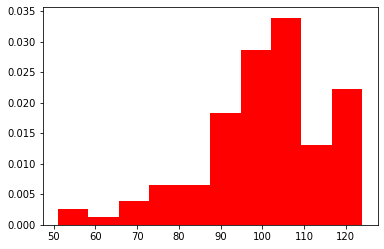

In [34]:
plt.hist(grades.total,bins='auto',color='red',density=True)

array([[<AxesSubplot:title={'center':'total'}>]], dtype=object)

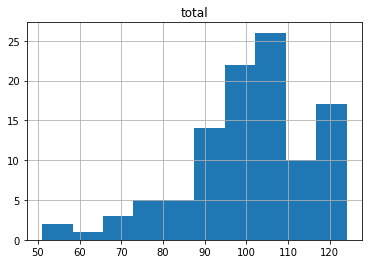

In [35]:
grades.hist('total')

<AxesSubplot:>

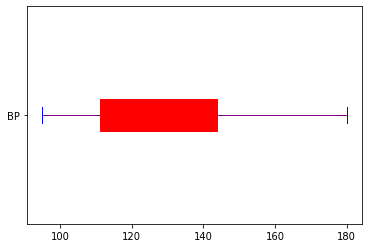

In [39]:
props2 = dict(boxes='red',whiskers='purple',medians='green',caps='blue')
cs2m['BP'].plot.box(color=props2,patch_artist=True,vert=False)

<AxesSubplot:>

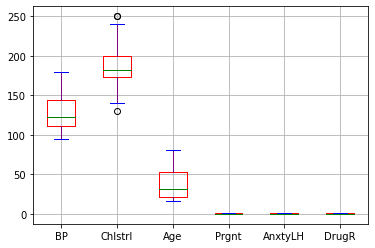

In [42]:
cs2m.boxplot(color=props2)

array([[<AxesSubplot:title={'center':'Age'}, xlabel='[Prgnt]'>,
        <AxesSubplot:title={'center':'AnxtyLH'}, xlabel='[Prgnt]'>],
       [<AxesSubplot:title={'center':'BP'}, xlabel='[Prgnt]'>,
        <AxesSubplot:title={'center':'Chlstrl'}, xlabel='[Prgnt]'>],
       [<AxesSubplot:title={'center':'DrugR'}, xlabel='[Prgnt]'>,
        <AxesSubplot:>]], dtype=object)

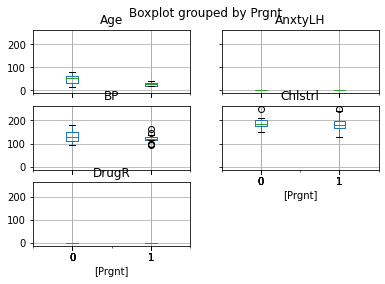

In [43]:
cs2m.boxplot(by='Prgnt')

<AxesSubplot:title={'center':'total'}, xlabel='[ethnicity]'>

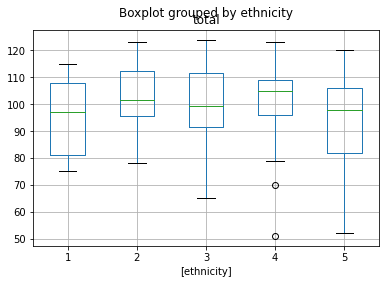

In [44]:
df = grades[['total','ethnicity']]
df.boxplot(by='ethnicity')

{'whiskers': [<matplotlib.lines.Line2D at 0x1b24f41df88>,
 'caps': [<matplotlib.lines.Line2D at 0x1b24f44da08>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b24f448dc8>],
 'medians': [<matplotlib.lines.Line2D at 0x1b24f453f88>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b24f4539c8>],
 'means': []}

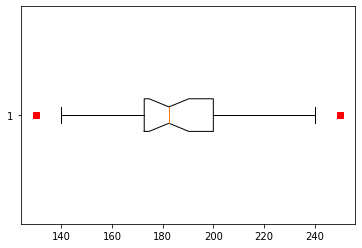

In [51]:
plt.boxplot(cs2m.Chlstrl , 1 , 'rs' ,0)

In [53]:
grades.iloc[:,0:4].head(3)

,Sr_No,id,lastname,firstname
0,1,106484,VILLARRUZ,ALFRED
1,2,108642,VALAZQUEZ,SCOTT
2,3,127285,GALVEZ,JACKIE


In [59]:
from random import sample
cs2m.sample(frac=0.3,random_state=123)

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
7,150,175,45,0,1,0
29,140,190,73,0,1,1
5,110,200,56,0,1,0
26,170,200,56,0,1,1
8,160,185,40,0,1,0
27,145,210,58,0,1,1
12,145,175,30,1,0,0
21,120,140,38,1,1,1
11,165,200,25,1,0,0


In [60]:
cs2m[cs2m.BP>140]

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR
7,150,175,45,0,1,0
8,160,185,40,0,1,0
11,165,200,25,1,0,0
12,145,175,30,1,0,0
24,150,195,65,0,1,1
26,170,200,56,0,1,1
27,145,210,58,0,1,1
28,180,200,81,0,1,1


In [63]:
cs2m['ageL'] = np.where(cs2m['Age']<32,'L','H')
cs2m.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,ageL
0,100,150,20,0,0,0,L
1,120,160,16,0,0,0,L
2,110,150,18,0,0,0,L
3,100,175,25,0,0,0,L
4,95,250,36,0,0,0,H


In [64]:
def set_age(row):
    if row['Age']<20:
        return 'L'
    elif row['Age']>=20 and row['Age']<35:
        return 'M'
    else:
        return 'H'
cs2m = cs2m.assign(AgeLH = cs2m.apply(set_age,axis=1))
cs2m.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,ageL,AgeLH
0,100,150,20,0,0,0,L,M
1,120,160,16,0,0,0,L,L
2,110,150,18,0,0,0,L,L
3,100,175,25,0,0,0,L,M
4,95,250,36,0,0,0,H,H


In [67]:
cs2m.drop(['ageL'],axis=1,inplace=True)
cs2m.head()

,BP,Chlstrl,Age,Prgnt,AnxtyLH,DrugR,AgeLH
0,100,150,20,0,0,0,M
1,120,160,16,0,0,0,L
2,110,150,18,0,0,0,L
3,100,175,25,0,0,0,M
4,95,250,36,0,0,0,H


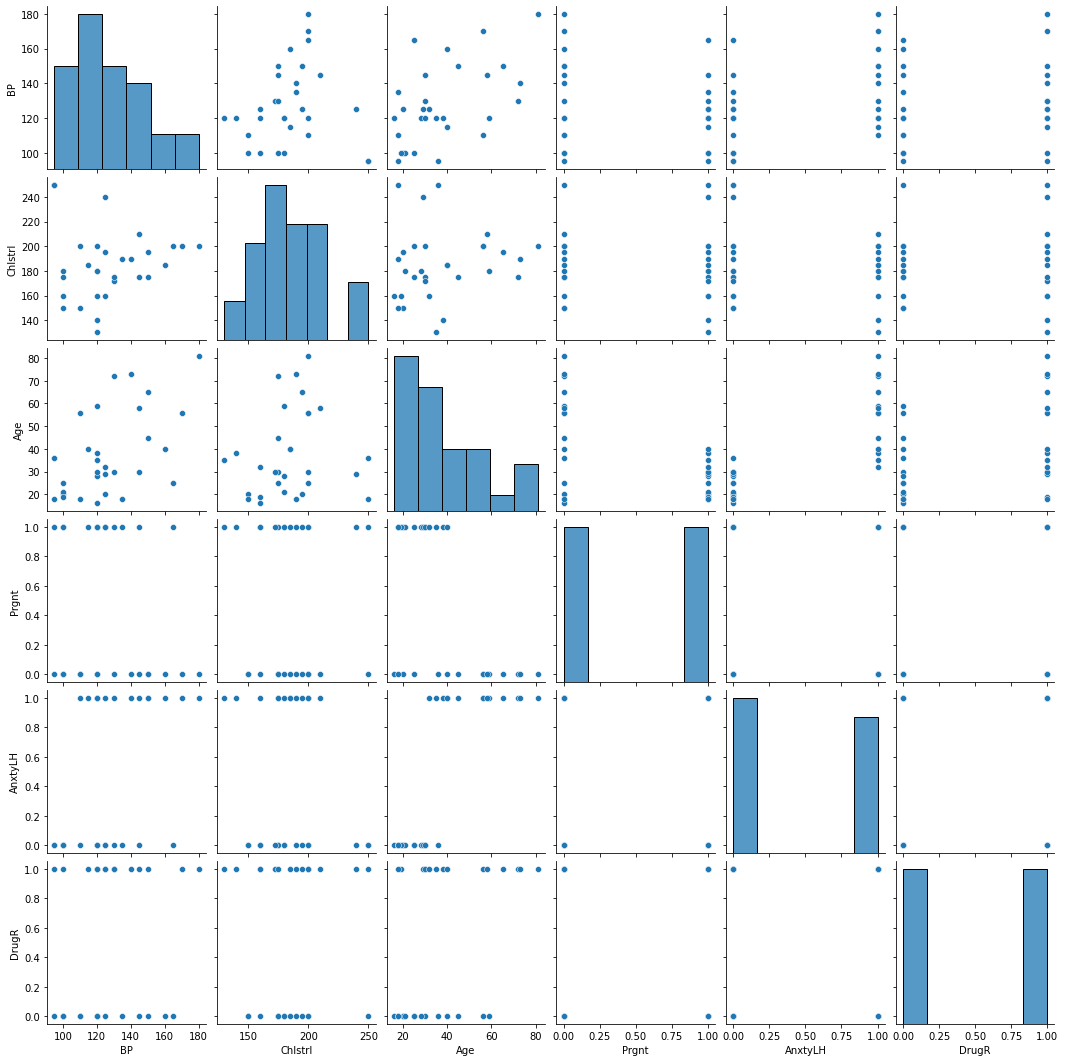

In [68]:
sns.pairplot(cs2m)

In [70]:
files = cs2m[['Age','BP','Chlstrl']]

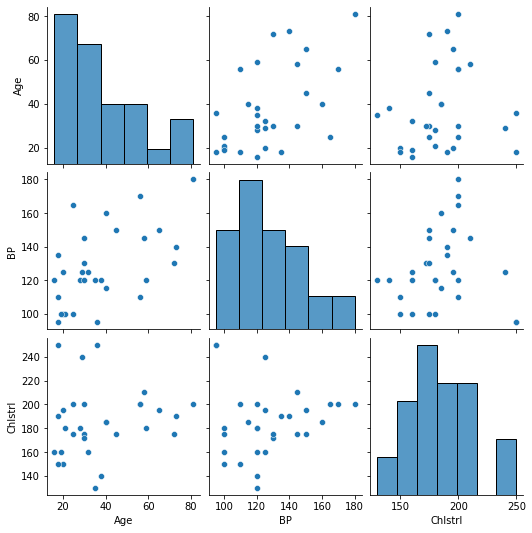

In [71]:
sns.pairplot(files)

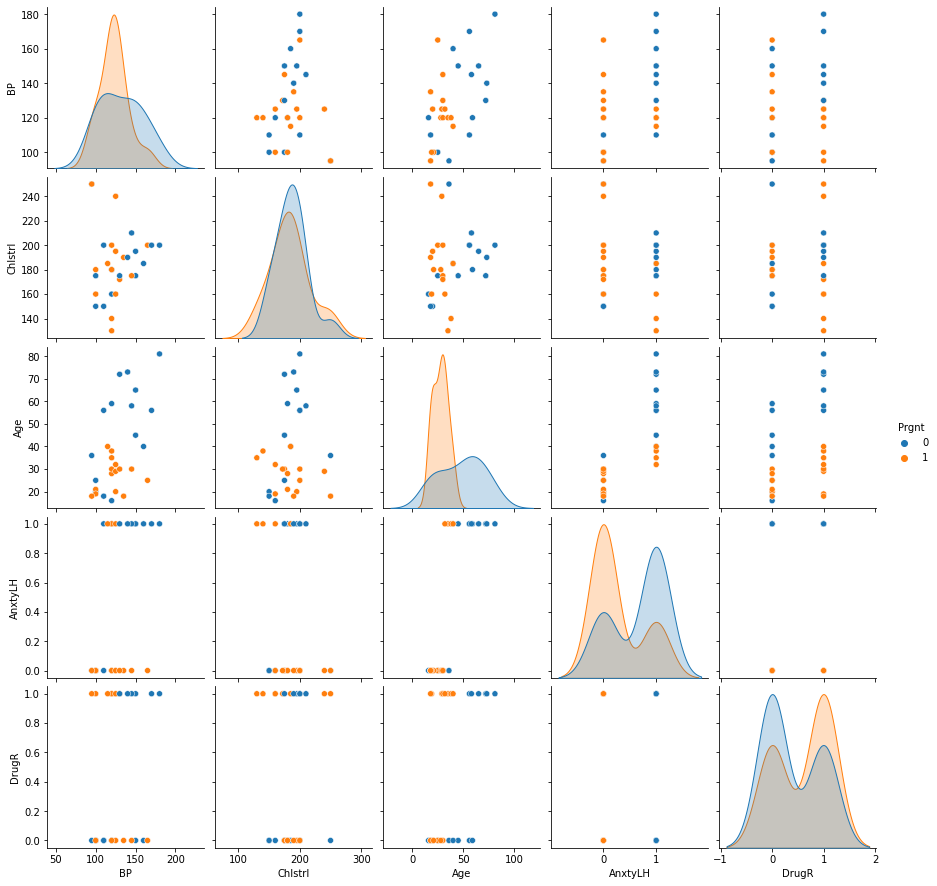

In [73]:
sns.pairplot(cs2m,hue='Prgnt')

In [75]:
pd.crosstab(grades.ethnicity,grades.gender,margins=True)

gender,1,2,All
ethnicity,,,
1,4,1,5
2,13,7,20
3,14,10,24
4,26,19,45
5,7,4,11
All,64,41,105
